In [4]:
import os
import xarray as xr
import matplotlib.pyplot as plt

In [69]:
from osprey.utils.time import get_decimal_year

In [8]:
from osprey.means.eof import process_data
from osprey.utils import catalogue

In [5]:
varname='thetao'
endleg=21
tmp = "/ec/res4/scratch/itas/martini/TS00/021"

In [9]:
info = catalogue.observables('nemo')[varname]

In [24]:
filename = os.path.join(tmp, f"{varname}_pattern.nc")
pattern = xr.open_mfdataset(filename, use_cftime=True, preprocess=lambda data: process_data(data, ftype='pattern', dim=info['dim'], grid=info['grid']))

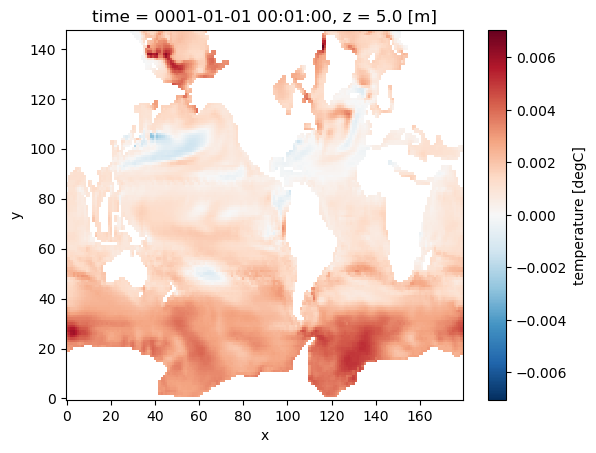

In [27]:
pattern['thetao'].isel(time=0,z=0).plot()

In [70]:
filename = os.path.join(tmp, f"{varname}_series_00000.nc")    
timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=lambda data: process_data(data, ftype='series', dim=info['dim'], grid=info['grid']))  

In [71]:
new_time = get_decimal_year(timeseries['time'].values)
timeseries['time'] = new_time

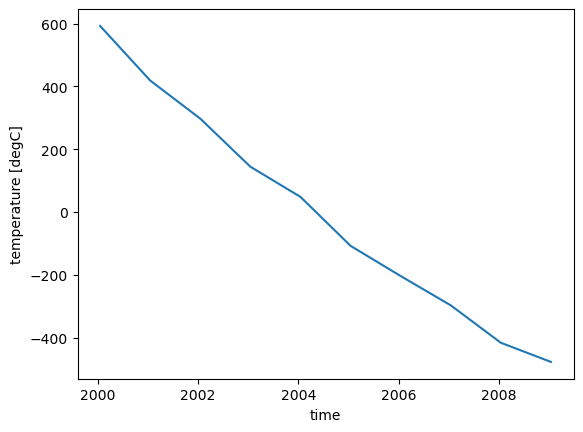

In [72]:
timeseries['thetao'].plot()

In [91]:
timeseries['thetao']

<xarray.DataArray 'thetao' (time: 10)> Size: 40B
dask.array<getitem, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 80B 2e+03 2.001e+03 ... 2.008e+03 2.009e+03
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  5400 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5400 s)

In [96]:
# Apply polyfit
p = timeseries.polyfit(dim='time', deg=1)

In [97]:
p['thetao_polyfit_coefficients'].values

array([-1.1905977e+02,  2.3866036e+05])

In [76]:
import numpy as np
import cftime

def _forecast_xarray(foreyear):
    """Get the xarray for the forecast time"""
    
    fdate = cftime.DatetimeGregorian(foreyear, 1, 16, 12, 0, 0, has_year_zero=False)
    xf = xr.DataArray(data = np.array([fdate]), dims = ['time'], coords = {'time': np.array([fdate])},
                      attrs = {'stardand_name': 'time', 'long_name': 'Time axis', 'bounds': 'time_counter_bnds', 'axis': 'T'})

    return xf

In [77]:
from osprey.utils.time import get_forecast_year

xf = _forecast_xarray(2008)

In [78]:
new_xf = get_decimal_year(xf.values)

In [89]:
theta = xr.polyval(xf, p[f"polyfit_coefficients"])

In [90]:
theta.values

array([-1.42929444e+20])

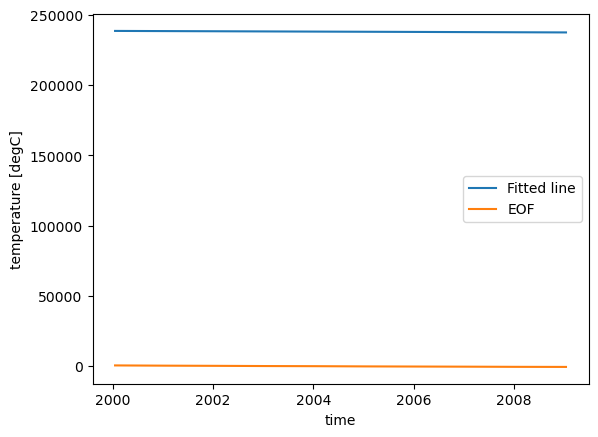

In [82]:
m, q = p[f"{varname}_polyfit_coefficients"].values
x = timeseries['time'].values
y = m * np.arange(len(x)) + q
plt.plot(x, y, label='Fitted line')
timeseries['thetao'].plot( label='EOF')
plt.legend()

In [55]:
theta = xr.polyval(xf, p[f"{varname}_polyfit_coefficients"])

In [56]:
theta.values

array([-3993.17232584])

TypeError: No numeric data to plot.

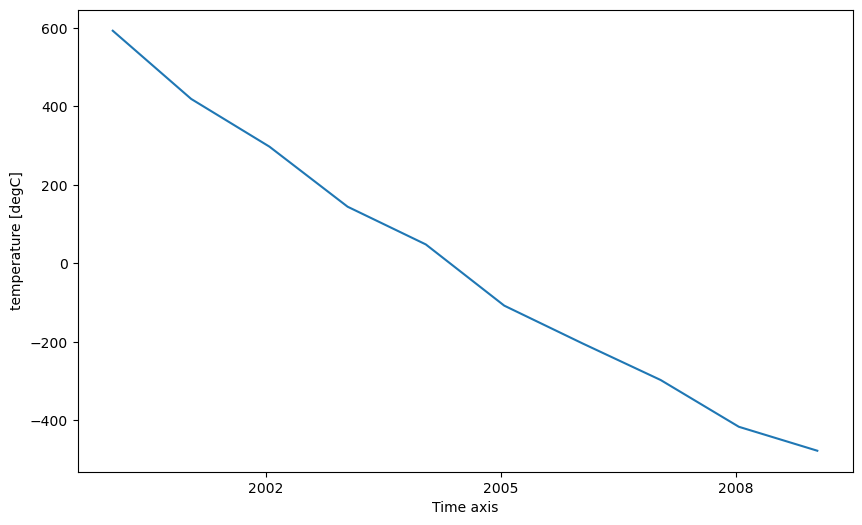

In [28]:
plt.figure(figsize=(10, 6))
timeseries['thetao'].plot(label='Timeseries')
theta.plot(label='Polyfit', linestyle='--', marker='o')
plt.legend()
plt.title('Timeseries with Polyfit Curve')
plt.xlabel('Time')
plt.ylabel('Thetao')
plt.show()